#Amazon Sales Data Analysis

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [49]:
#load dataset

df = pd.read_excel("/content/amazon_sales_data.xlsx")

In [50]:
df.head()

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825


In [51]:
#rename column
df.rename(columns= {"Sales":"total_sales"},inplace = True)

In [52]:
df.head()

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,total_sales,Quantity,Profit
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825


In [53]:
df.tail(3)

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,total_sales,Quantity,Profit
3200,CA-2014-121258,2014-02-27,2014-03-04,DaveBrooks@gmail.com,"United States,Costa Mesa,California",Phones,Aastra 57i VoIP phone,258.576,2,19.3932
3201,CA-2014-121258,2014-02-27,2014-03-04,DaveBrooks@gmail.com,"United States,Costa Mesa,California",Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,13.3200
3202,CA-2014-119914,2014-05-05,2014-05-10,ChrisCortes@gmail.com,"United States,Westminster,California",Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,72.9480


In [54]:
df.info() # it seems there is no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      3203 non-null   object        
 1   Order Date    3203 non-null   datetime64[ns]
 2   Ship Date     3203 non-null   datetime64[ns]
 3   EmailID       3203 non-null   object        
 4   Geography     3203 non-null   object        
 5   Category      3203 non-null   object        
 6   Product Name  3203 non-null   object        
 7   total_sales   3203 non-null   float64       
 8   Quantity      3203 non-null   int64         
 9   Profit        3203 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 250.4+ KB


In [55]:
#lets check once again there is  any null values or not
df.isna().sum()

Order ID        0
Order Date      0
Ship Date       0
EmailID         0
Geography       0
Category        0
Product Name    0
total_sales     0
Quantity        0
Profit          0
dtype: int64

In [56]:
df.describe()

,Order Date,Ship Date,total_sales,Quantity,Profit
count,3203,3203,3203.000000,3203.000000,3203.000000
mean,2013-05-10 03:06:07.530440192,2013-05-14 01:25:25.195129600,226.493233,3.828910,33.849032
min,2011-01-07 00:00:00,2011-01-09 00:00:00,0.990000,1.000000,-3399.980000
25%,2012-05-22 00:00:00,2012-05-26 00:00:00,19.440000,2.000000,3.852000
50%,2013-07-22 00:00:00,2013-07-25 00:00:00,60.840000,3.000000,11.166400
75%,2014-05-23 00:00:00,2014-05-27 00:00:00,215.809000,5.000000,33.000400
max,2014-12-31 00:00:00,2015-01-06 00:00:00,13999.960000,14.000000,6719.980800
std,NaN,NaN,524.876877,2.260947,174.109081


In [57]:
df.dtypes

Order ID                object
Order Date      datetime64[ns]
Ship Date       datetime64[ns]
EmailID                 object
Geography               object
Category                object
Product Name            object
total_sales            float64
Quantity                 int64
Profit                 float64
dtype: object

## From here actual analysis and manipulation start

In [58]:
df[["country","city","state"]] = df.Geography.str.split(",", expand =True) #extracting data from field and creating new fields

In [59]:
df.head()

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,total_sales,Quantity,Profit,country,city,state
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714,United States,Los Angeles,California
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694,United States,Los Angeles,California
2,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Art,Newell 322,7.280,4,1.9656,United States,Los Angeles,California
3,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152,United States,Los Angeles,California
4,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825,United States,Los Angeles,California


In [60]:
df["customer_name"] = df.EmailID.str.split("@",expand=True)[0] # extract left side only [before delimeter]

In [61]:
df.head(2)

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,total_sales,Quantity,Profit,country,city,state,customer_name
0,CA-2013-138688,2013-06-13,2013-06-17,DarrinVanHuff@gmail.com,"United States,Los Angeles,California",Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,6.8714,United States,Los Angeles,California,DarrinVanHuff
1,CA-2011-115812,2011-06-09,2011-06-14,BrosinaHoffman@gmail.com,"United States,Los Angeles,California",Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7,14.1694,United States,Los Angeles,California,BrosinaHoffman


In [62]:
df.drop(["Geography","EmailID"], axis =1 , inplace = True) #droping columns because i already extracted data from these columns so no use to keep them

In [63]:
df.head()

,Order ID,Order Date,Ship Date,Category,Product Name,total_sales,Quantity,Profit,country,city,state,customer_name
0,CA-2013-138688,2013-06-13,2013-06-17,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714,United States,Los Angeles,California,DarrinVanHuff
1,CA-2011-115812,2011-06-09,2011-06-14,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694,United States,Los Angeles,California,BrosinaHoffman
2,CA-2011-115812,2011-06-09,2011-06-14,Art,Newell 322,7.280,4,1.9656,United States,Los Angeles,California,BrosinaHoffman
3,CA-2011-115812,2011-06-09,2011-06-14,Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152,United States,Los Angeles,California,BrosinaHoffman
4,CA-2011-115812,2011-06-09,2011-06-14,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825,United States,Los Angeles,California,BrosinaHoffman


###1.Sales Performance Analysis:

1.	Regional Sales and Profit Analysis:

*	Calculate total sales, total profit, and average order value by state.
*	Identify states with the highest and lowest sales performance.
*	Compare sales performance across different months and years to identify seasonal trends and anomalies.


In [64]:
#Calculate total sales, total profit, and average order value by state.

total_sales_data = df.total_sales.sum()
print("Total Sales:",round(total_sales_data),"\n")

total_profit = df.Profit.sum()
print("Total Profit:",round(total_profit),"\n\n")

avg_order = (df.groupby('state')['total_sales'].sum()) / df.groupby("state")["Order ID"].nunique()
print("Average Order value by :",avg_order.round())

#for clean code and better understanding
# unique_order = df.groupby("state")["Order ID"].nunique()
# tot_sales = df.groupby('state')['total_sales'].sum()
# avg_order = tot_sales / unique_order
# print(avg_order)

Total Sales: 725458 

Total Profit: 108418 


Average Order value by : state
Arizona        327.0
California     448.0
Colorado       406.0
Idaho          398.0
Montana        699.0
Nevada         727.0
New Mexico     217.0
Oregon         311.0
Utah           432.0
Washington     542.0
Wyoming       1603.0
dtype: float64


In [65]:
#Identify states with the highest and lowest sales performance.

sales_by_state = df.groupby("state")['total_sales'].sum()

#it will return max sale
highest_sales = sales_by_state.sort_values(ascending=False).head(1)
print("Highest Sales by ",highest_sales.round())
print("\n")
#it will return min sales
lowest_sales = sales_by_state.sort_values(ascending=True).head(1) # return top value
print("The Lowest Sales by:",lowest_sales.round())

Highest Sales by  state
California    457688.0
Name: total_sales, dtype: float64


The Lowest Sales by: state
Wyoming    1603.0
Name: total_sales, dtype: float64


In [66]:
# Compare sales performance across different months and years to identify seasonal trends and anomalies

#extract month and year
#converting order date to datetime format

df["Order Date"] = pd.to_datetime(df['Order Date'])

#extract month and year

df['month'] = df['Order Date'].dt.month
df['year'] = df['Order Date'].dt.year


sales_performance = df.groupby(['year','month']).total_sales.sum()
sales_performance.round().unstack().fillna(0)

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2011,2648.0,1349.0,11009.0,9343.0,6570.0,9629.0,21809.0,13248.0,14901.0,8729.0,23192.0,25456.0
2012,6027.0,2005.0,15461.0,9056.0,12043.0,5089.0,7090.0,12548.0,13899.0,14017.0,14549.0,28183.0
2013,3658.0,3100.0,17559.0,10370.0,10806.0,18598.0,14418.0,12681.0,23621.0,13135.0,26412.0,32617.0
2014,12586.0,9815.0,28994.0,13197.0,15902.0,15203.0,21391.0,24197.0,29198.0,21556.0,28916.0,29678.0


In [67]:
sales_performance.to_csv("comparision_sales.csv")
#i used tableau

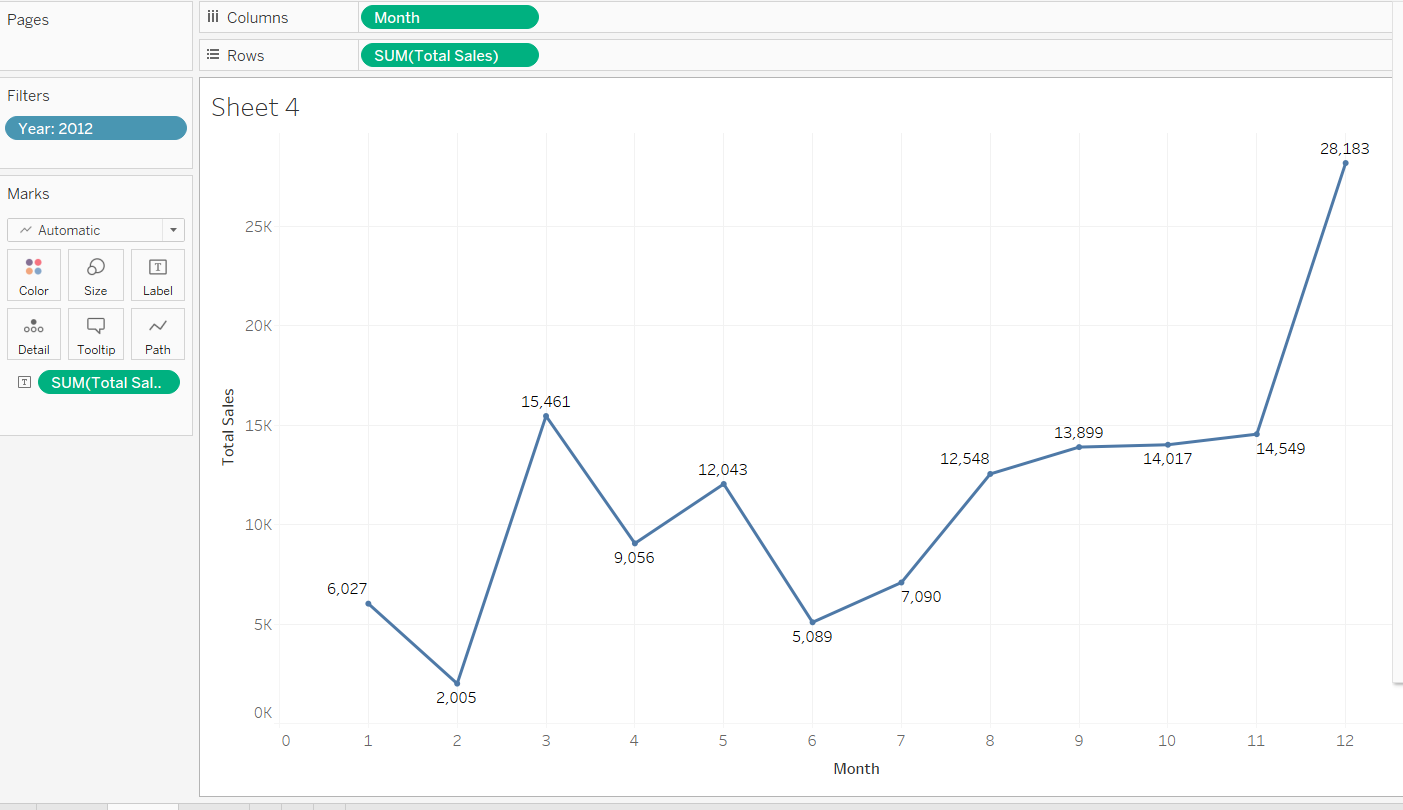

###2.	Top Products by Sales and Profit:

*	Determine the top 10 products by total sales and profit.
*	Analyze trends in sales and profitability for these top products.


In [68]:
df.head()

,Order ID,Order Date,Ship Date,Category,Product Name,total_sales,Quantity,Profit,country,city,state,customer_name,month,year
0,CA-2013-138688,2013-06-13,2013-06-17,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714,United States,Los Angeles,California,DarrinVanHuff,6,2013
1,CA-2011-115812,2011-06-09,2011-06-14,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694,United States,Los Angeles,California,BrosinaHoffman,6,2011
2,CA-2011-115812,2011-06-09,2011-06-14,Art,Newell 322,7.280,4,1.9656,United States,Los Angeles,California,BrosinaHoffman,6,2011
3,CA-2011-115812,2011-06-09,2011-06-14,Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152,United States,Los Angeles,California,BrosinaHoffman,6,2011
4,CA-2011-115812,2011-06-09,2011-06-14,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825,United States,Los Angeles,California,BrosinaHoffman,6,2011


In [69]:
df.rename(columns={'Product Name':"product_name"},inplace=True)

In [70]:
df.head()

,Order ID,Order Date,Ship Date,Category,product_name,total_sales,Quantity,Profit,country,city,state,customer_name,month,year
0,CA-2013-138688,2013-06-13,2013-06-17,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714,United States,Los Angeles,California,DarrinVanHuff,6,2013
1,CA-2011-115812,2011-06-09,2011-06-14,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694,United States,Los Angeles,California,BrosinaHoffman,6,2011
2,CA-2011-115812,2011-06-09,2011-06-14,Art,Newell 322,7.280,4,1.9656,United States,Los Angeles,California,BrosinaHoffman,6,2011
3,CA-2011-115812,2011-06-09,2011-06-14,Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152,United States,Los Angeles,California,BrosinaHoffman,6,2011
4,CA-2011-115812,2011-06-09,2011-06-14,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825,United States,Los Angeles,California,BrosinaHoffman,6,2011


In [71]:
#Determine the top 10 products by total sales and profit.

top_ten = df.groupby('product_name')[['total_sales','Profit']].sum()
top_ten = top_ten.sort_values(by =["total_sales","Profit"] , ascending=[False ,False])
top_ten.head(10)

,total_sales,Profit
product_name,,
Canon imageCLASS 2200 Advanced Copier,13999.960,6719.9808
High Speed Automatic Electric Letter Opener,13100.240,524.0096
Global Troy Executive Leather Low-Back Tilter,10019.600,626.2250
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,8134.336,3050.3760
GuestStacker Chair with Chrome Finish Legs,8030.016,803.0016
Okidata MB760 Printer,7834.400,881.3700
Bretford Rectangular Conference Table Tops,7710.665,180.5424
LogitechÂ P710e Mobile Speakerphone,7467.210,1418.7699
Canon PC1060 Personal Laser Copier,6719.904,2267.9676


In [72]:
top_ten.to_csv("top10_customer.csv")


In [73]:
#i used powerbi for visualization

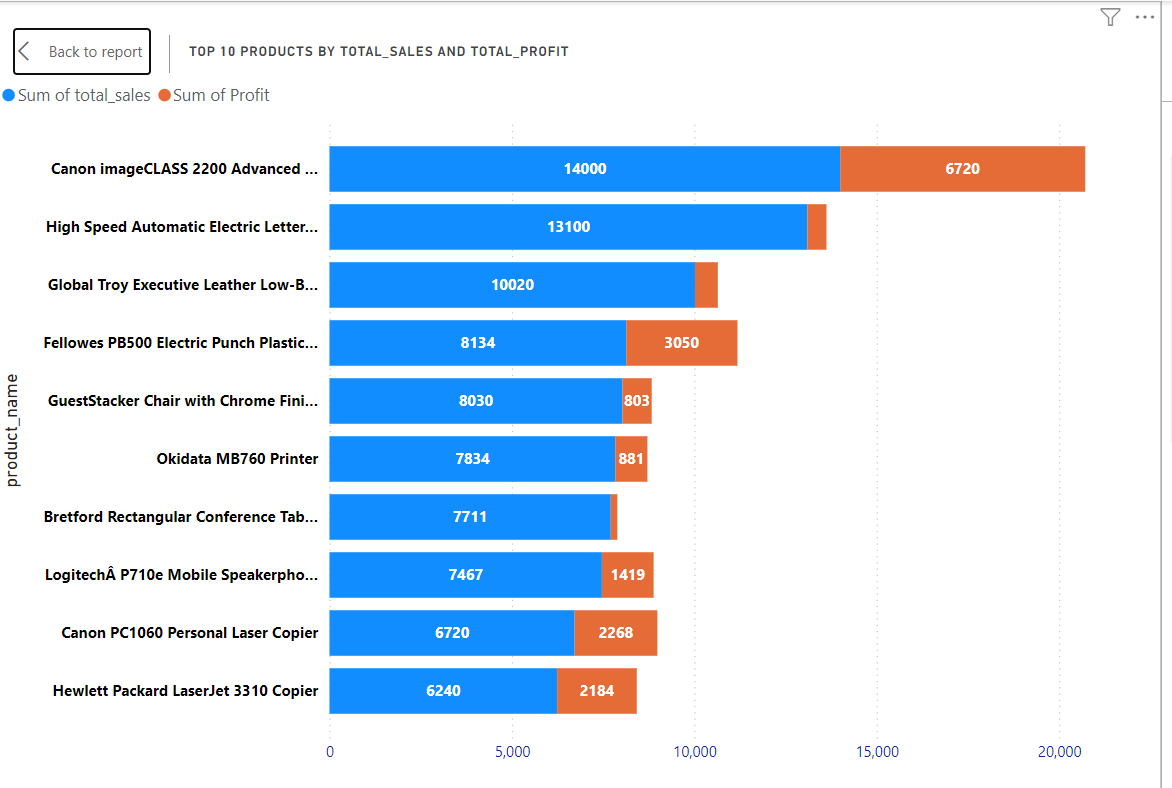

###3.	Monthly and Yearly Sales Trends:

*	Examine sales trends on a monthly and yearly basis.
*	Identify and analyze seasonal patterns and their impact on sales.


In [74]:
sales_based_over_time = df.groupby(["year","month"])["total_sales"].sum().round()
sales_based_over_time.unstack().fillna(0) # pivot table using pandas

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2011,2648.0,1349.0,11009.0,9343.0,6570.0,9629.0,21809.0,13248.0,14901.0,8729.0,23192.0,25456.0
2012,6027.0,2005.0,15461.0,9056.0,12043.0,5089.0,7090.0,12548.0,13899.0,14017.0,14549.0,28183.0
2013,3658.0,3100.0,17559.0,10370.0,10806.0,18598.0,14418.0,12681.0,23621.0,13135.0,26412.0,32617.0
2014,12586.0,9815.0,28994.0,13197.0,15902.0,15203.0,21391.0,24197.0,29198.0,21556.0,28916.0,29678.0


In [75]:
sales_based_over_time.unstack().fillna(0).to_excel("sales_trend_based_ontime.xlsx")

In [76]:
# i used powerbi for visualization

#### slicer allows us to focus on one year at a time, making the visual much cleaner and easier to interpret



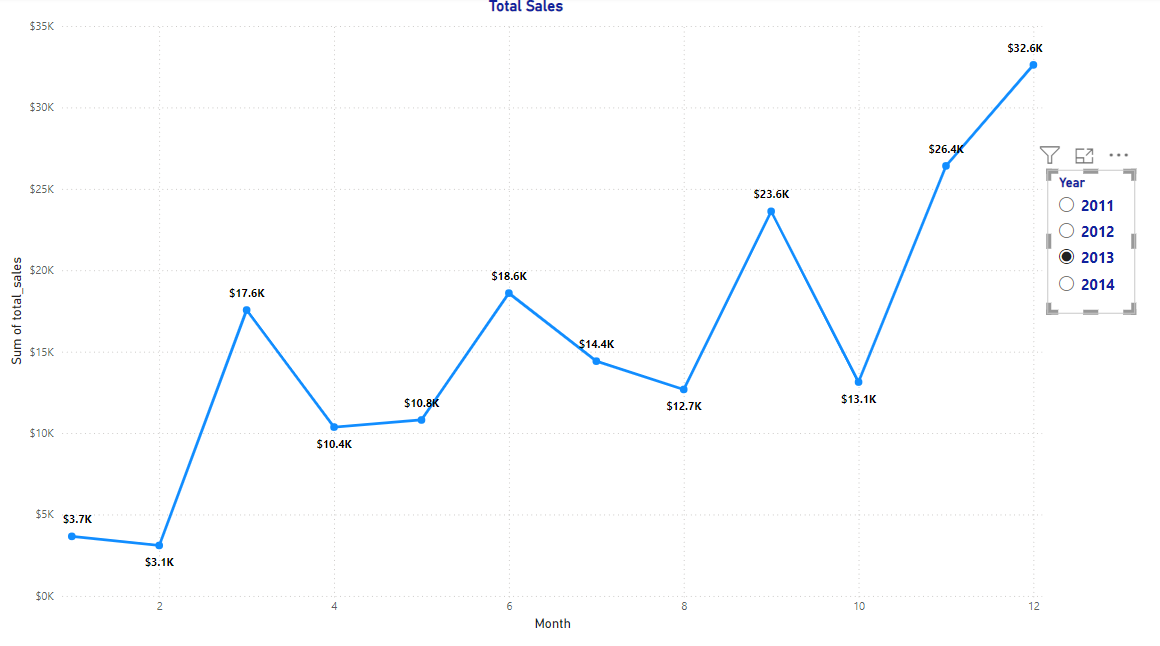


#### Without Slicer It hard to read trend



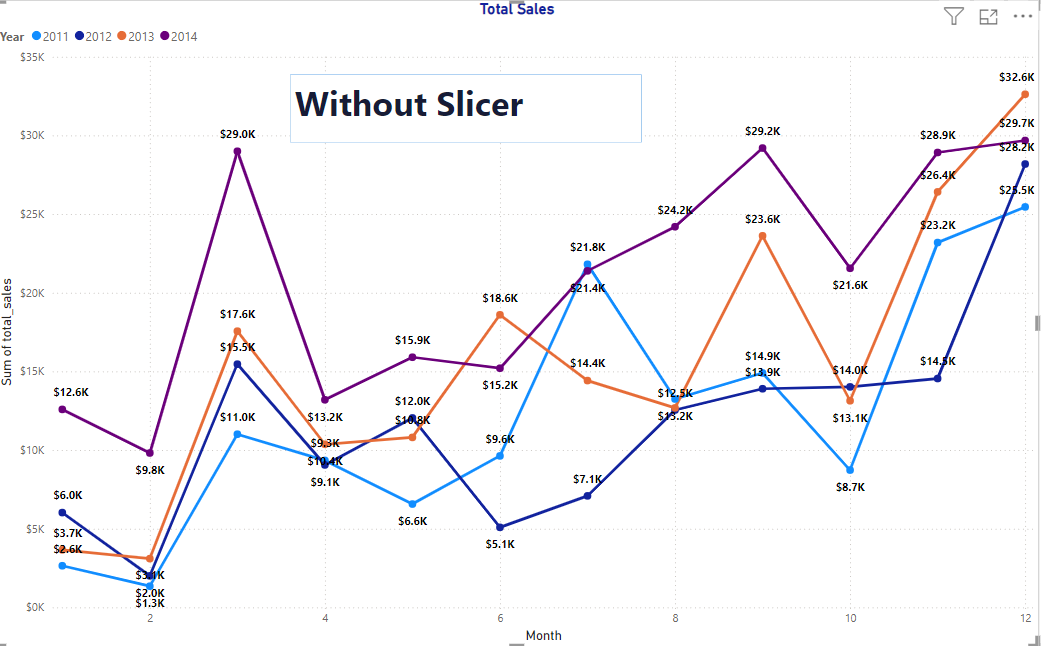

###. Customer Insights:
####1.	Customer Segmentation and Profitability:

*	Segment customers based on purchasing behavior and profitability.
*	Analyze characteristics and patterns within each order.
*	Determine customer lifetime value and identify high-value customer order.


In [77]:
df.head(2)

,Order ID,Order Date,Ship Date,Category,product_name,total_sales,Quantity,Profit,country,city,state,customer_name,month,year
0,CA-2013-138688,2013-06-13,2013-06-17,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,6.8714,United States,Los Angeles,California,DarrinVanHuff,6,2013
1,CA-2011-115812,2011-06-09,2011-06-14,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7,14.1694,United States,Los Angeles,California,BrosinaHoffman,6,2011


In [78]:
segment_analysis = df.groupby(["customer_name","Order ID","Category"]).agg(total_sales = ("total_sales","sum") ,total_profits = ("Profit","sum"), order_count = ("Order ID",'nunique'))
segment_analysis.sort_values(by =["total_sales","total_profits","order_count"] , ascending=[False ,False ,False]).head()

,,,total_sales,total_profits,order_count
customer_name,Order ID,Category,,,
RaymondBuch,CA-2014-140151,Copiers,13999.960,6719.9808,1
KenLonsdale,CA-2011-143917,Supplies,8187.650,327.5060,1
JaneWaco,CA-2014-135909,Binders,5083.960,1906.4850,1
EdwardHooks,CA-2013-136301,Supplies,4912.590,196.5036,1
NickCrebassa,CA-2014-149881,Machines,4799.984,359.9988,1


In [79]:
segment_analysis.sort_values(by =["total_sales","total_profits","order_count"] , ascending=[False ,False ,False]).head(10)

,,,total_sales,total_profits,order_count
customer_name,Order ID,Category,,,
RaymondBuch,CA-2014-140151,Copiers,13999.960,6719.9808,1
KenLonsdale,CA-2011-143917,Supplies,8187.650,327.5060,1
JaneWaco,CA-2014-135909,Binders,5083.960,1906.4850,1
EdwardHooks,CA-2013-136301,Supplies,4912.590,196.5036,1
NickCrebassa,CA-2014-149881,Machines,4799.984,359.9988,1
DennisPardue,CA-2013-138478,Binders,4535.976,1644.2913,1
MaxJones,CA-2013-100300,Machines,4476.800,503.6400,1
NoraPreis,CA-2011-168494,Tables,4375.536,230.9928,1
KarenFerguson,CA-2013-159016,Phones,4158.912,363.9048,1


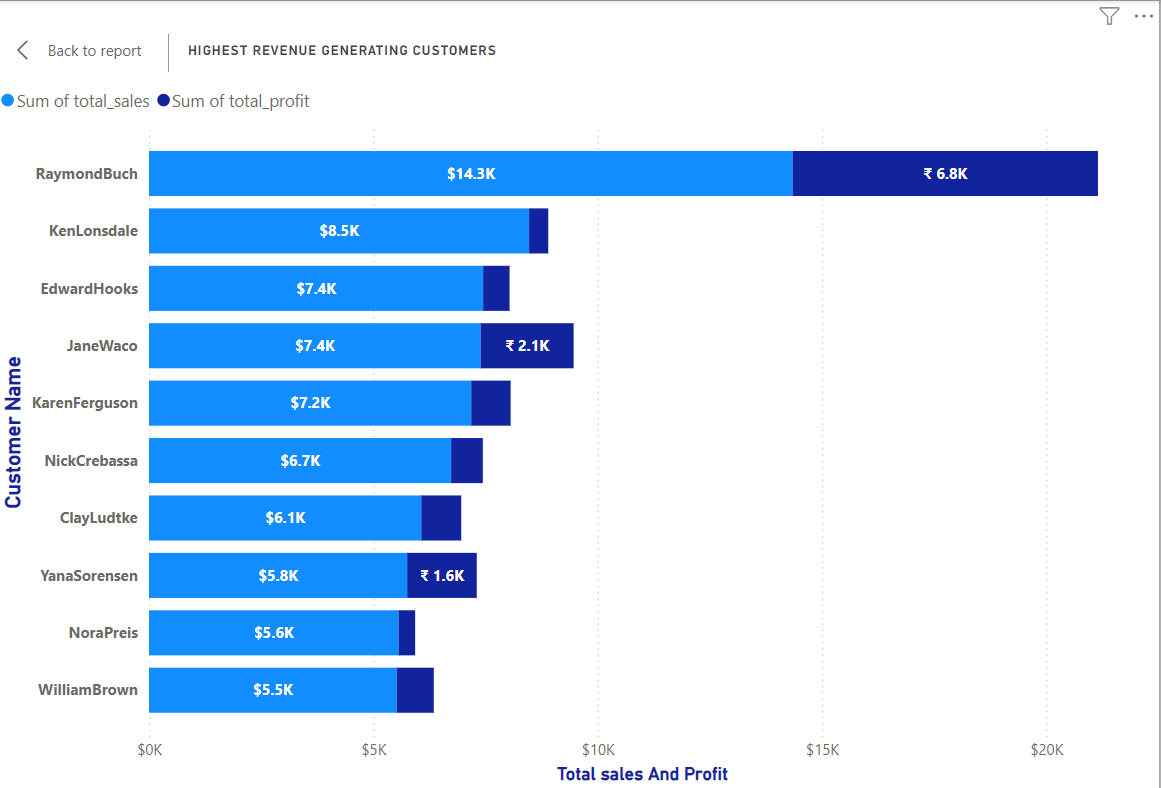

###3.	Customer Retention and Loyalty:

*	Analyze customer retention rates and factors contributing to customer loyalty.
*	Evaluate the effectiveness of loyalty programs.
*	Propose strategies to enhance customer retention.


In [80]:
frequent_cust =  df.groupby(["customer_name","Order Date"]).agg(total_sales= ('total_sales','sum'), order_count= ("Order ID","count"))
frequent_cust.sort_values(by = ["order_count",], ascending=[ False,]).head(10)

,,total_sales,order_count
customer_name,Order Date,,
WilliamBrown,2013-12-12,1937.924,11
GregGuthrie,2011-10-31,1007.936,9
SandraGlassco,2012-10-31,2562.171,9
KeithHerrera,2014-12-09,3955.507,9
IreneMaddox,2012-12-11,730.038,9
ResiPÃ¶lking,2011-09-13,561.730,8
JeremyLonsdale,2014-08-08,2563.314,8
TimBrockman,2011-12-08,265.784,8
DanReichenbach,2014-08-28,2971.792,8


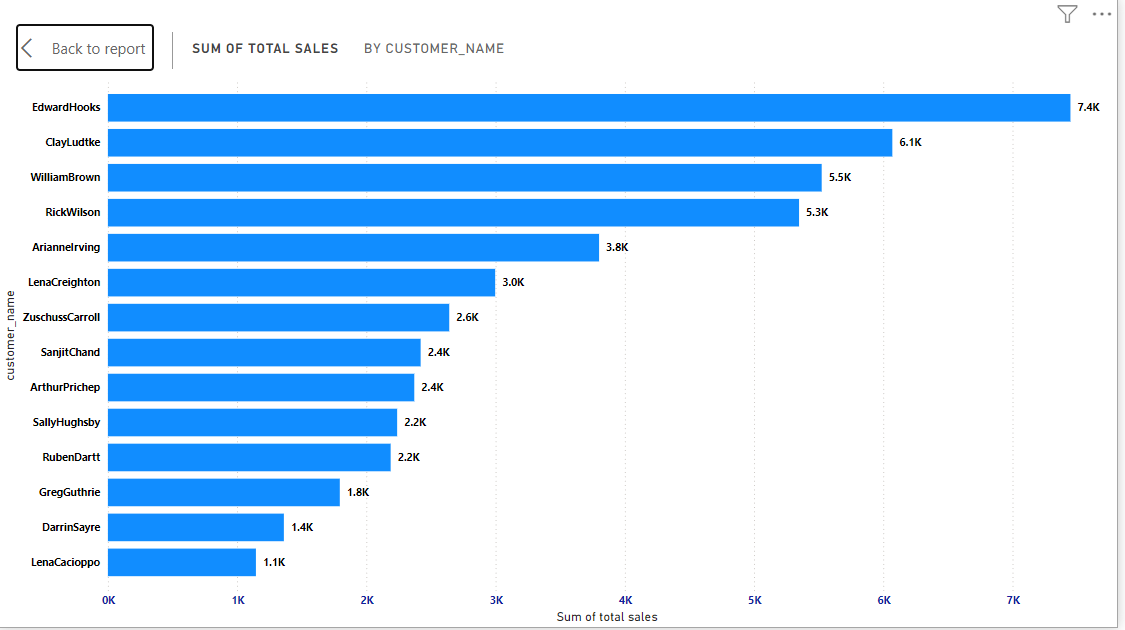



#### orders by customer name

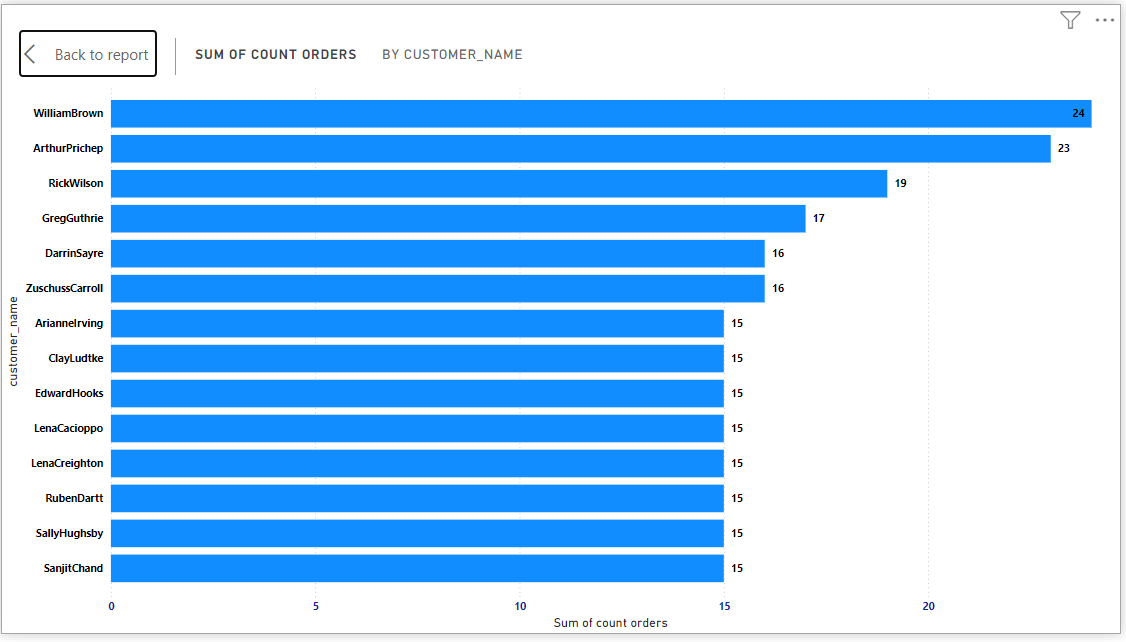

####4. Order Details Analysis:
High-Profit Orders Analysis:

Sales and Profit by Product Category:

*	Analyze total sales and profit by product category.

*	Identify orders with the highest profit margins and analyze their characteristics.

*	Recommend strategies to replicate high-profit orders


In [81]:
 #profit margin or profit ratio
 df["profit_margin %"] = df['Profit'] / df['total_sales'] * 100

 high_profit_margin =  df.sort_values(by = 'profit_margin %' , ascending=False)

 high_profit_margin.head()

,Order ID,Order Date,Ship Date,Category,product_name,total_sales,Quantity,Profit,country,city,state,customer_name,month,year,profit_margin %
1384,CA-2011-153983,2011-11-29,2011-12-06,Fasteners,Staples,30.40,5,15.20,United States,San Francisco,California,AlanHwang,11,2011,50.0
2957,CA-2011-153619,2011-11-03,2011-11-03,Art,Prang Dustless Chalk Sticks,6.72,4,3.36,United States,Los Angeles,California,TracyCollins,11,2011,50.0
2527,CA-2012-127481,2012-12-12,2012-12-15,Paper,Xerox 1916,97.88,2,48.94,United States,Las Vegas,Nevada,JonathanDoherty,12,2012,50.0
227,CA-2013-112942,2013-02-13,2013-02-18,Paper,Tops Green Bar Computer Printout Paper,146.82,3,73.41,United States,Los Angeles,California,RossDeVincentis,2,2013,50.0
415,US-2011-157021,2011-04-01,2011-04-06,Labels,Avery 490,29.60,2,14.80,United States,Vallejo,California,KunstMiller,4,2011,50.0


In [82]:
high_profit_cat_analysis = high_profit_margin.groupby("Category").agg(Total_Sales = ("total_sales", "sum" ) ,average_profit_margin = ("profit_margin %","mean"),Total_Profit = ("Profit",'sum') )
high_profit_cat_analysis.sort_values("Total_Sales", ascending=False)

,Total_Sales,average_profit_margin,Total_Profit
Category,,,
Chairs,101781.3280,2.149758,4027.5843
Phones,98684.3520,8.574007,9110.7426
Tables,84754.5620,-5.396552,1482.6073
Storage,70532.8520,13.232143,8645.3222
Accessories,61114.1160,24.138566,16484.5983
Binders,55961.1130,16.658705,16096.8016
Copiers,49749.2420,33.250000,19327.2351
Machines,42444.1220,-6.581197,-618.9264
Bookcases,36004.1235,-25.775245,-1646.5117


##### Profit Margin By Category

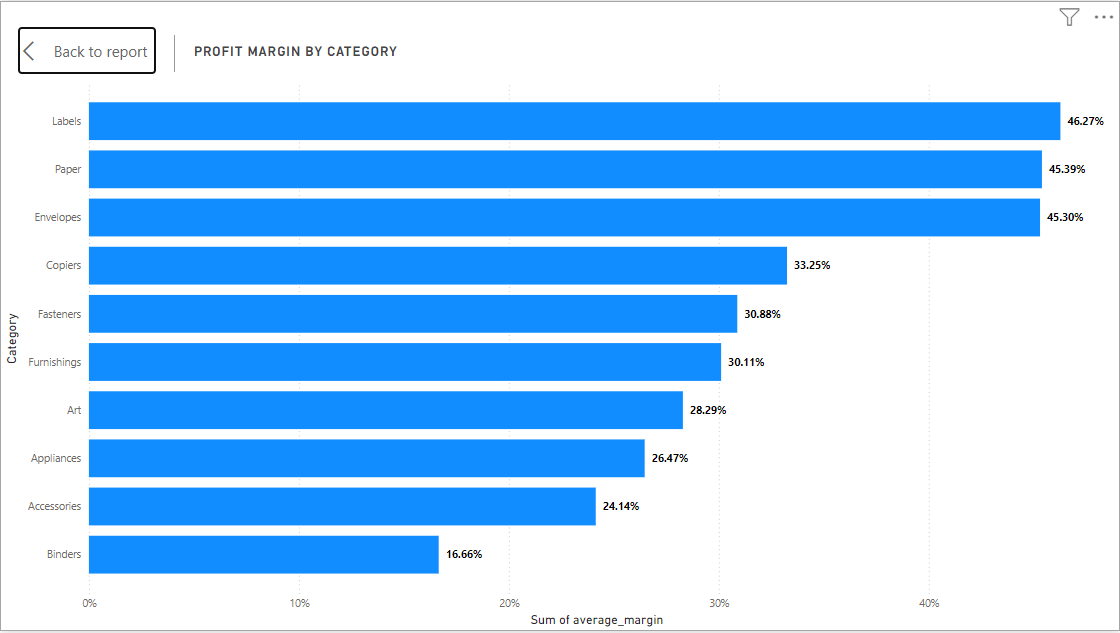



#### TOtal Profit By Category

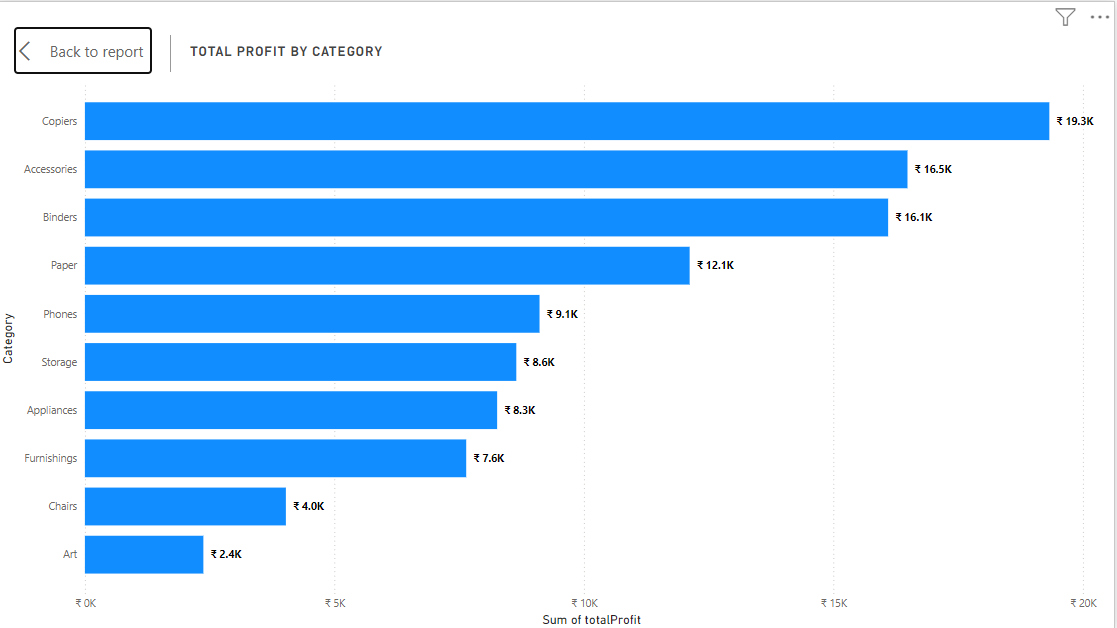


#### Total Sales By Category

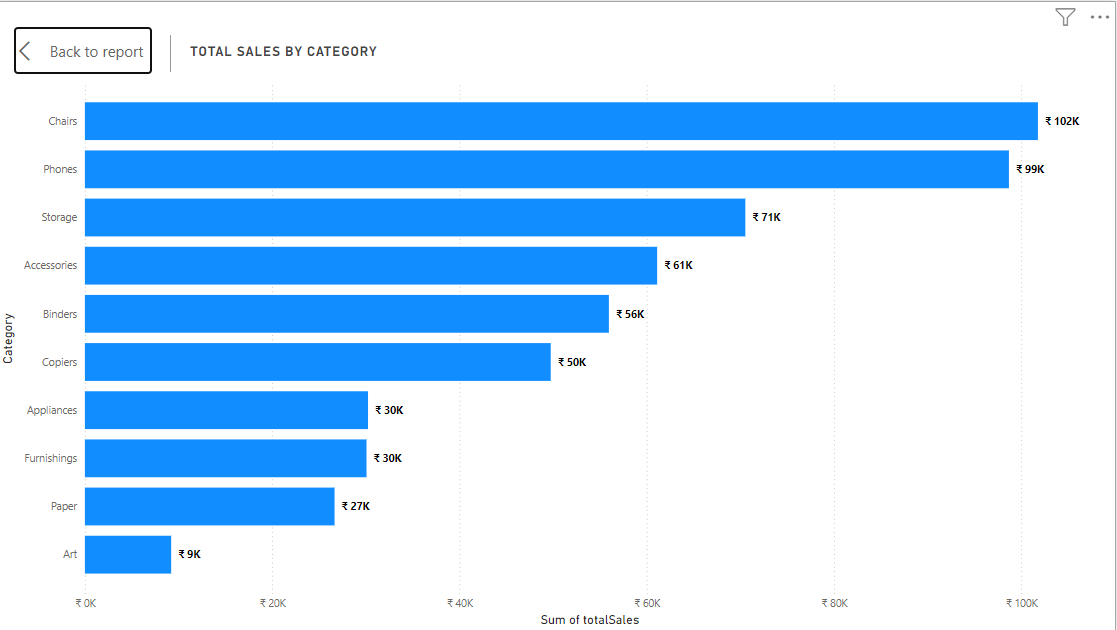

In [83]:
high_profit_cust_analysis = high_profit_margin.groupby("customer_name").agg(Total_Sales = ("total_sales","sum"), total_Profit = ('Profit','sum') , order_id_count=("Order ID", "count") , average_profit_margin = ("profit_margin %","mean"))
high_profit_cust_analysis.sort_values("average_profit_margin", ascending =False).head(10)

,Total_Sales,total_Profit,order_id_count,average_profit_margin
customer_name,,,,
LarryBlacks,21.48,10.7400,1,50.0
RossDeVincentis,146.82,73.4100,1,50.0
CatherineGlotzbach,11.76,5.7624,1,49.0
SeanMiller,9.96,4.8804,1,49.0
TomPrescott,12.96,6.3504,1,49.0
NonaBalk,244.24,119.3436,2,48.5
DelfinaLatchford,38.88,18.6624,1,48.0
JulieKriz,143.70,68.9760,1,48.0
LycorisSaunders,19.44,9.3312,1,48.0


##### Top 10 Customers By Sales

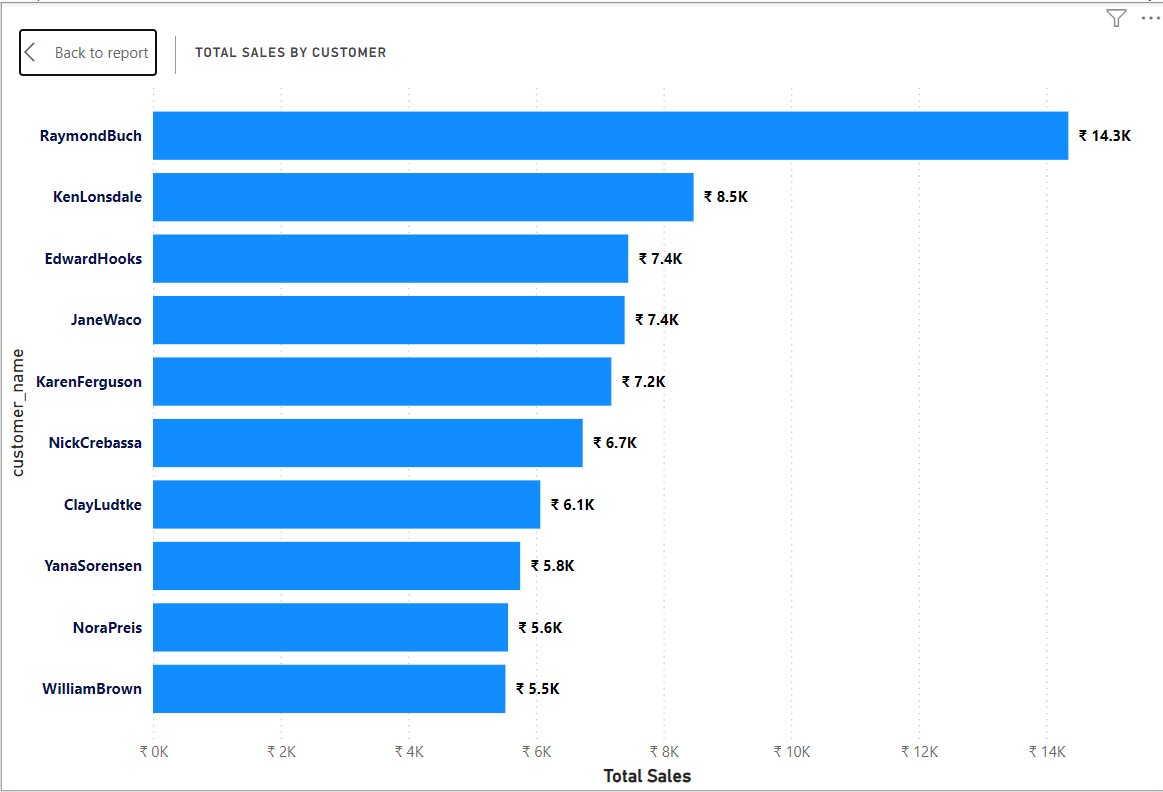


#####top 10 profit by customers
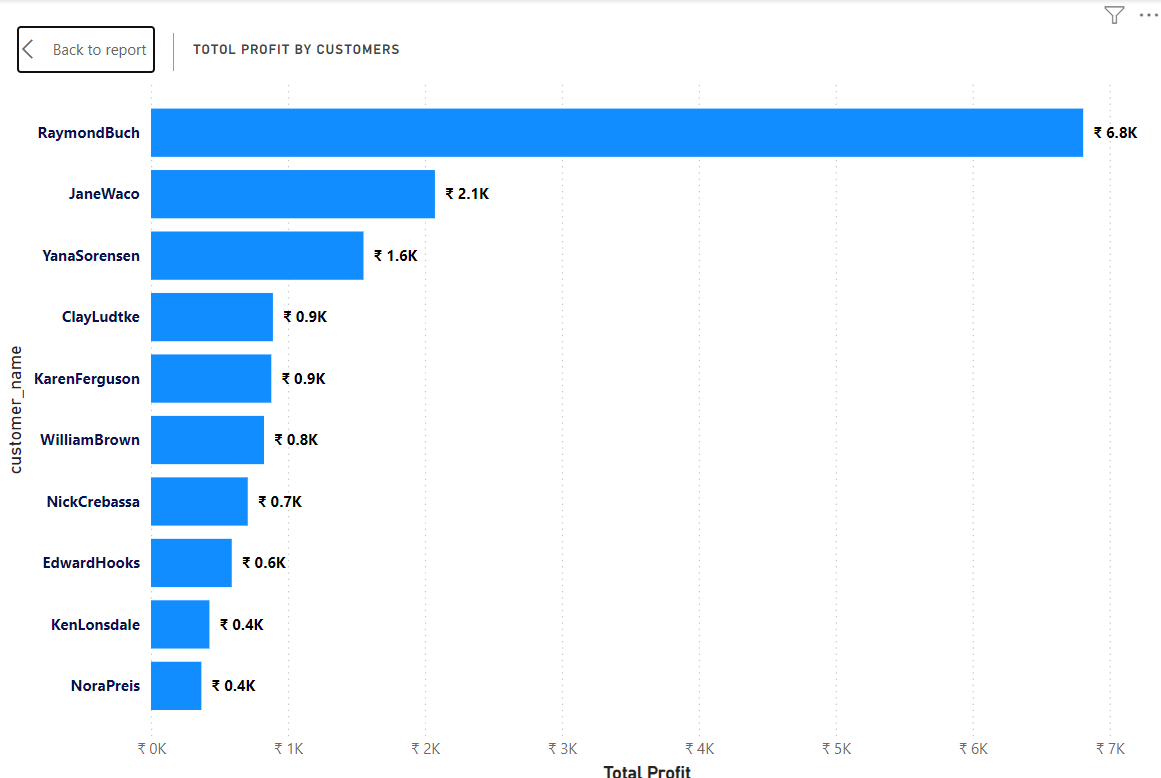



In [84]:
df.head()

,Order ID,Order Date,Ship Date,Category,product_name,total_sales,Quantity,Profit,country,city,state,customer_name,month,year,profit_margin %
0,CA-2013-138688,2013-06-13,2013-06-17,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714,United States,Los Angeles,California,DarrinVanHuff,6,2013,47.00
1,CA-2011-115812,2011-06-09,2011-06-14,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,14.1694,United States,Los Angeles,California,BrosinaHoffman,6,2011,29.00
2,CA-2011-115812,2011-06-09,2011-06-14,Art,Newell 322,7.280,4,1.9656,United States,Los Angeles,California,BrosinaHoffman,6,2011,27.00
3,CA-2011-115812,2011-06-09,2011-06-14,Phones,Mitel 5320 IP Phone VoIP phone,907.152,4,90.7152,United States,Los Angeles,California,BrosinaHoffman,6,2011,10.00
4,CA-2011-115812,2011-06-09,2011-06-14,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,5.7825,United States,Los Angeles,California,BrosinaHoffman,6,2011,31.25


In [85]:
df.head(2)

,Order ID,Order Date,Ship Date,Category,product_name,total_sales,Quantity,Profit,country,city,state,customer_name,month,year,profit_margin %
0,CA-2013-138688,2013-06-13,2013-06-17,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,6.8714,United States,Los Angeles,California,DarrinVanHuff,6,2013,47.0
1,CA-2011-115812,2011-06-09,2011-06-14,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7,14.1694,United States,Los Angeles,California,BrosinaHoffman,6,2011,29.0



####5. Profit Analysis:
1. Profit Margin Analysis by Product:

*	Analyze profit margins for each product and identify products with low or negative margins.



In [122]:
low_profit_margin = df.sort_values(by = "profit_margin %",)
unique_low_profit_margin = low_profit_margin.drop_duplicates(subset='product_name')

unique_low_profit_margin[["product_name","profit_margin %"]].head(10)

,product_name,profit_margin %
2593,"Bush Westfield Collection Bookcases, Dark Cher...",-210.000000
1524,"Bush Westfield Collection Bookcases, Dark Cher...",-206.666667
1770,O'Sullivan 2-Shelf Heavy-Duty Bookcases,-180.000000
2000,O'Sullivan 4-Shelf Bookcase in Odessa Pine,-176.666667
2599,Sauder Barrister Bookcases,-170.000000
1699,Bestar Classic Bookcase,-170.000000
2028,"Bush Cubix Collection Bookcases, Fully Assembled",-156.666667
2551,"Hon Metal Bookcases, Black",-150.000000
2453,Hon 4-Shelf Metal Bookcases,-150.000000
2192,Panasonic KX MC6040 Color Laser Multifunction ...,-143.333333


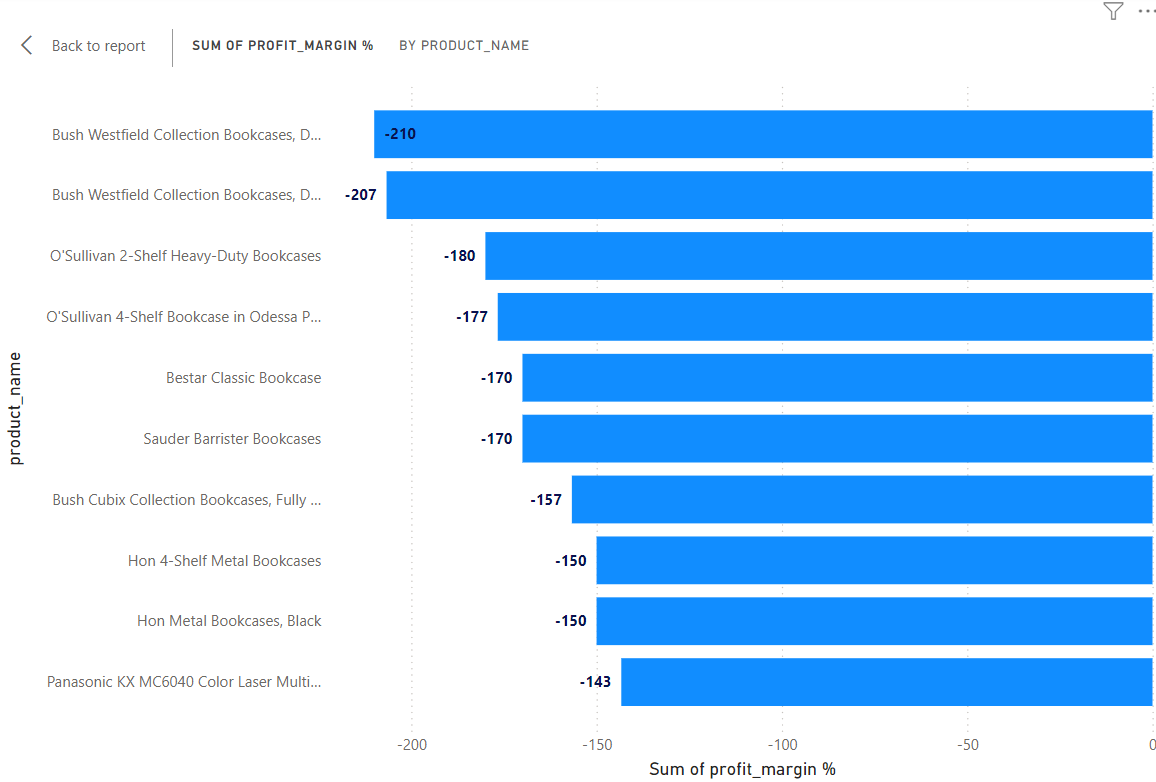

#Thank You

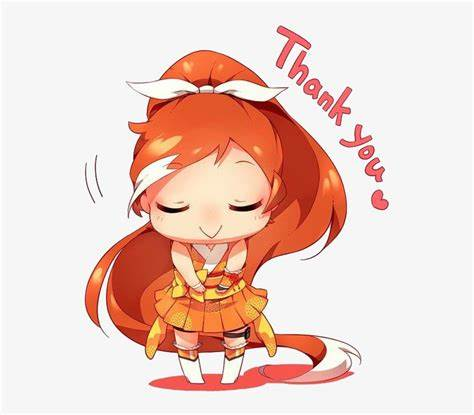